In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 

In [14]:
pylum = pd.read_csv('../data/rauw/illumina/Pylum-level microbiota.csv')
pylum.head(10)

,Sample ID,Firmicutes,Proteobacteria,Actinobacteria,Tenericutes,Bacteroidetes,Armatimonadetes,Spirochaetes,Planctomycetes,Verrucomicrobia,...,Deferribacteres,Dictyoglomi,Balneolaeota,Fibrobacteres,Chlamydiae,Acidobacteria,Kiritimatiellaeota,Nitrospirae,candidate.division.Zixibacteria,Thermodesulfobacteria
0,UAB 17001,52.7866,22.8393,17.7473,0.0325,3.2061,0.0260,0.0195,0.0065,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1,UAB 17002,26.8138,55.7956,1.8540,0.0040,0.0161,0.0121,0.0000,0.0020,0.0040,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0020,0.0000,0.0020
2,UAB 17003,60.5104,8.7647,5.1275,0.0060,23.6522,0.0424,0.0089,0.0201,0.0000,...,0.0007,0.0037,0.0000,0.0000,0.0022,0.0000,0.0,0.0007,0.0000,0.0000
3,UAB 17004,29.1573,7.5317,9.0231,0.0746,1.0440,0.0000,0.0746,0.0000,0.0746,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
4,UAB 17005,76.8142,4.7258,11.9876,0.0407,2.1745,0.0204,0.1375,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0407,0.0000,0.0,0.0051,0.0000,0.0000
5,UAB 17006,74.4002,10.1792,13.0713,0.0112,0.2280,0.0273,0.0273,0.0048,0.0000,...,0.0016,0.0000,0.0000,0.0000,0.0000,0.1076,0.0,0.0000,0.0032,0.0000
6,UAB 17007,63.0646,0.7472,5.3379,21.2978,0.5354,0.0013,0.0039,0.0013,0.0013,...,0.0000,0.0013,0.0000,0.0000,0.0013,0.0000,0.0,0.0000,0.0000,0.0013
7,UAB 17008,73.9986,9.8571,9.1169,0.0171,2.7578,0.0613,0.0951,0.1077,0.0008,...,0.0020,0.0179,0.0004,0.0004,0.0012,0.0000,0.0,0.0000,0.0000,0.0004
8,UAB 17009,64.7139,1.6725,2.9357,0.0051,11.4486,0.0288,0.0826,0.0023,0.0000,...,0.0017,0.0051,0.0000,0.0000,0.0006,0.0000,0.0,0.0006,0.0006,0.0006
9,UAB 17010,59.5769,28.7744,5.7057,0.0856,3.9442,0.0084,0.4506,0.0365,0.0000,...,0.0126,0.0000,0.0000,0.0014,0.0014,0.0000,0.0,0.0000,0.0000,0.0028


## Fertility & Infertility

In [15]:
# split the first column by ' ' if the first value is CON set is as fertile df, otherwise infertile df
pylum['fertility'] = pylum['Sample ID'].str.split(' ').str[0]

# set fertility to 1 if CON, 0 if UAB
pylum['fertility'] = np.where(pylum['fertility'] == 'CON', 1, 0)

#### PCA

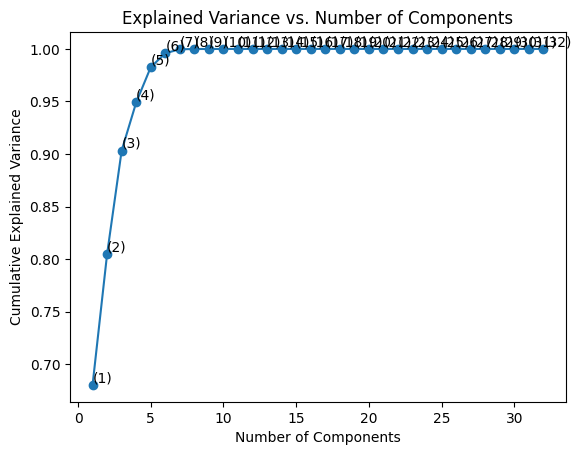

In [16]:
features = pylum.iloc[:, 1:]

# Apply PCA
pca = PCA()
pca.fit(features)

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Add text annotations for each point
for i, (num_components, explained_variance) in enumerate(zip(range(1, len(pca.explained_variance_ratio_) + 1), 
                                                               np.cumsum(pca.explained_variance_ratio_))):
    plt.text(num_components, explained_variance, f'({num_components})', ha='left', va='bottom')

plt.show()

In [17]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=6)  # Choose the number based on the explained variance plot
features_pca = pca.fit_transform(features)

#### KMEANS

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:8

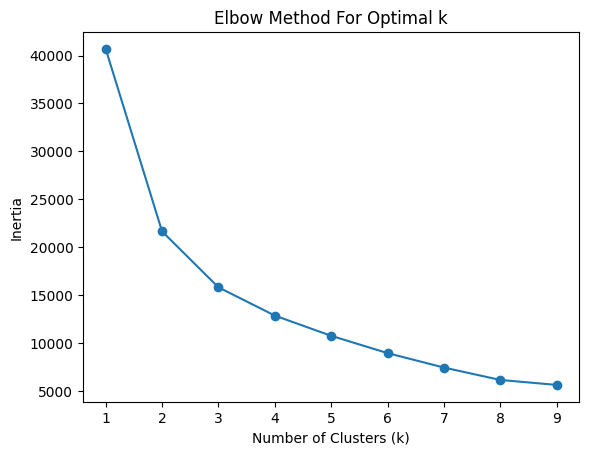

In [18]:
# Initialize a range of k values
k_values = range(1, 10)

# Fit KMeans for each k and calculate the inertia (sum of squared distances to the closest centroid)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


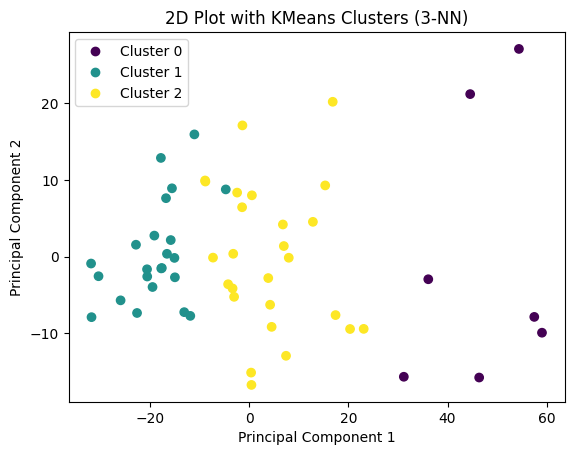

In [19]:
# Fit KMeans clustering on the features
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_pca)

# Add the cluster labels to the DataFrame
pylum['cluster'] = cluster_labels

# Plot the 2D data with different colors for each cluster
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', label='Clusters')
plt.title('2D Plot with KMeans Clusters (3-NN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

In [20]:
# Add a new column for each combination of cluster and fertility
pylum['cluster_fertility'] = pylum['cluster'].astype(str) + '_' + pylum['fertility'].astype(str)
pylum.head(5)

,Sample ID,Firmicutes,Proteobacteria,Actinobacteria,Tenericutes,Bacteroidetes,Armatimonadetes,Spirochaetes,Planctomycetes,Verrucomicrobia,...,Fibrobacteres,Chlamydiae,Acidobacteria,Kiritimatiellaeota,Nitrospirae,candidate.division.Zixibacteria,Thermodesulfobacteria,fertility,cluster,cluster_fertility
0,UAB 17001,52.7866,22.8393,17.7473,0.0325,3.2061,0.0260,0.0195,0.0065,0.0000,...,0.0,0.0000,0.0,0.0,0.0000,0.0,0.000,0,2,2_0
1,UAB 17002,26.8138,55.7956,1.8540,0.0040,0.0161,0.0121,0.0000,0.0020,0.0040,...,0.0,0.0000,0.0,0.0,0.0020,0.0,0.002,0,0,0_0
2,UAB 17003,60.5104,8.7647,5.1275,0.0060,23.6522,0.0424,0.0089,0.0201,0.0000,...,0.0,0.0022,0.0,0.0,0.0007,0.0,0.000,0,2,2_0
3,UAB 17004,29.1573,7.5317,9.0231,0.0746,1.0440,0.0000,0.0746,0.0000,0.0746,...,0.0,0.0000,0.0,0.0,0.0000,0.0,0.000,0,2,2_0
4,UAB 17005,76.8142,4.7258,11.9876,0.0407,2.1745,0.0204,0.1375,0.0000,0.0000,...,0.0,0.0407,0.0,0.0,0.0051,0.0,0.000,0,1,1_0


#### RANDOMFOREST

In [21]:
X = pylum.drop(['cluster_fertility', 'cluster', 'fertility', 'Sample ID'], axis=1)
y = pylum['cluster_fertility']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Display additional evaluation metrics
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.67
              precision    recall  f1-score   support

         0_0       0.00      0.00      0.00         0
         1_0       0.60      1.00      0.75         3
         1_1       0.00      0.00      0.00         2
         2_0       0.83      0.83      0.83         6
         2_1       0.00      0.00      0.00         1

    accuracy                           0.67        12
   macro avg       0.29      0.37      0.32        12
weighted avg       0.57      0.67      0.60        12

[[0 0 0 0 0]
 [0 3 0 0 0]
 [0 2 0 0 0]
 [1 0 0 5 0]
 [0 0 0 1 0]]


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.

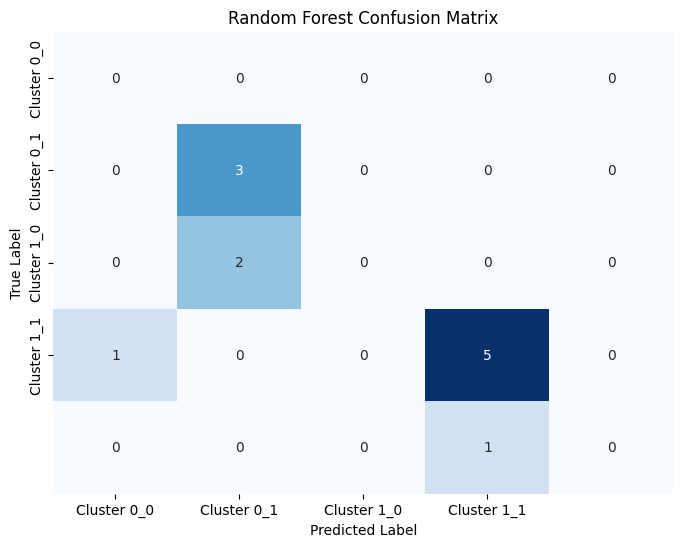

In [24]:
# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cluster 0_0', 'Cluster 0_1', 'Cluster 1_0', 'Cluster 1_1'],
            yticklabels=['Cluster 0_0', 'Cluster 0_1', 'Cluster 1_0', 'Cluster 1_1'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
# save the MLP model
filename = 'pylum_random_forest'
pickle.dump(rf_classifier, open(filename, 'wb'))